In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error



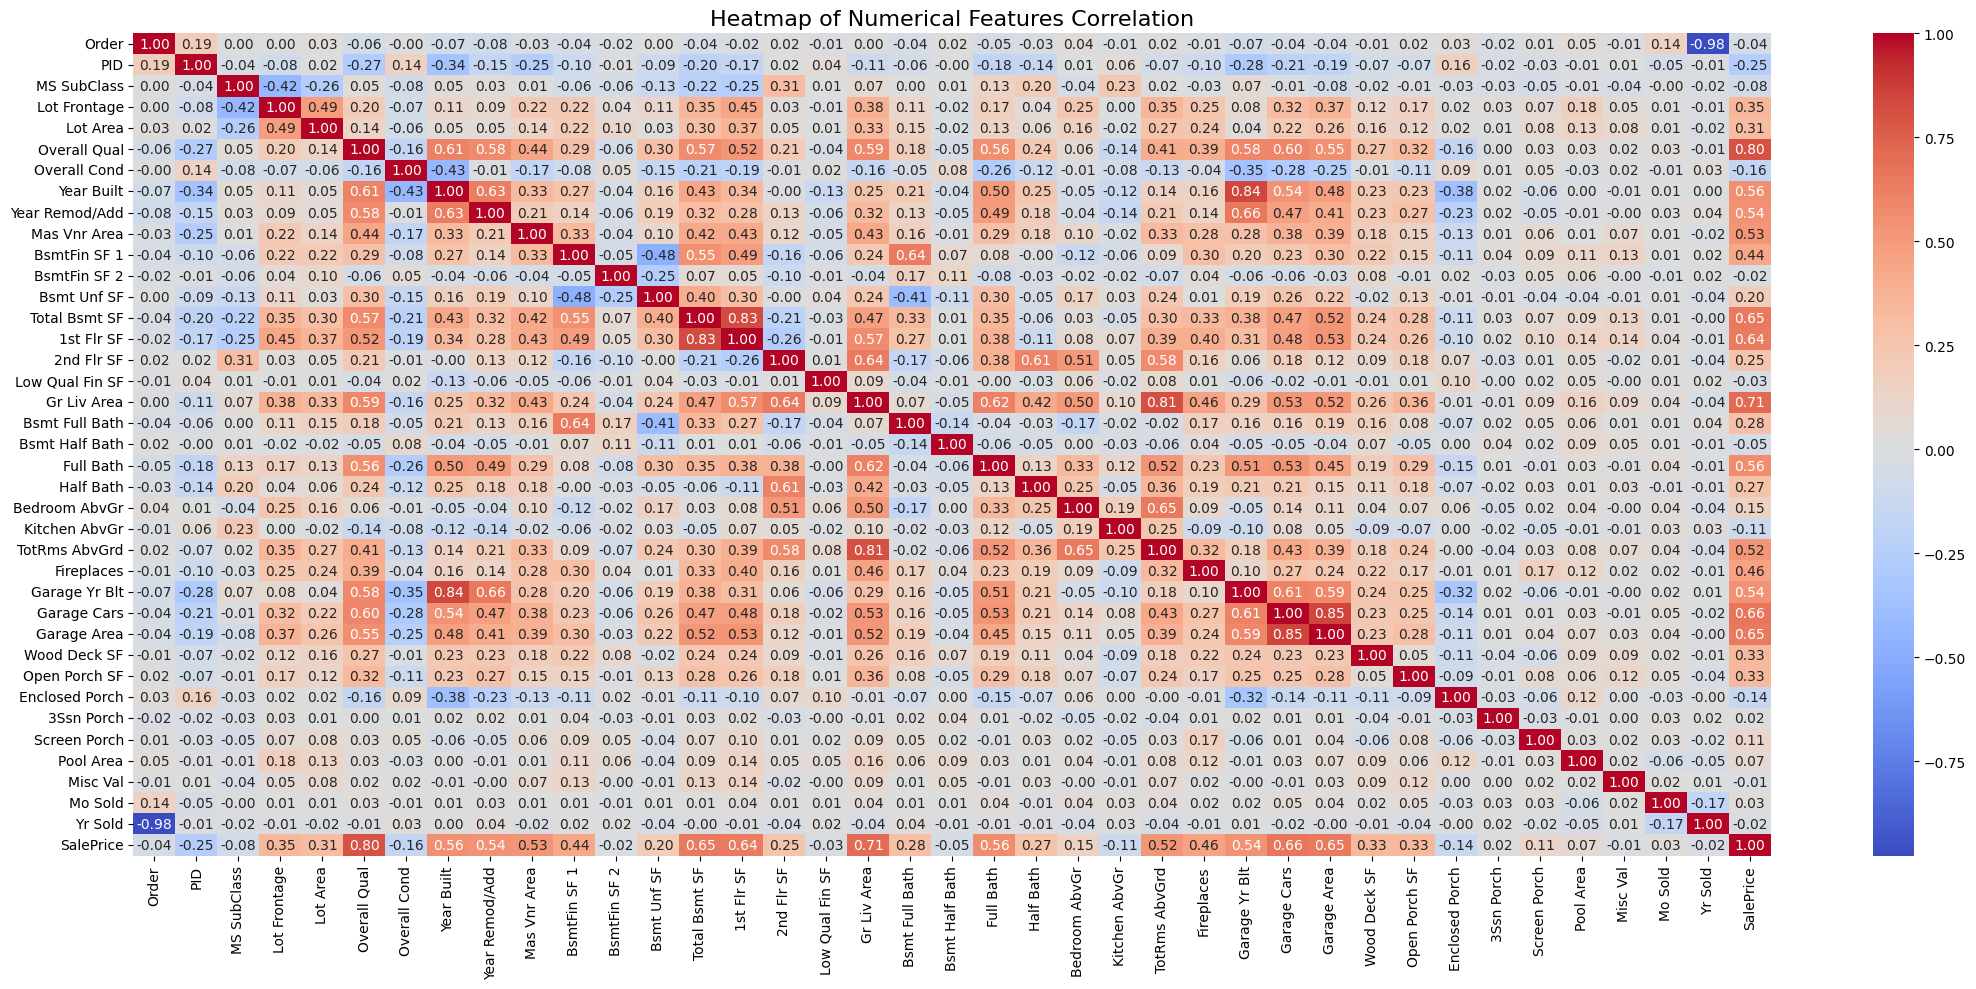

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,P,210,62,0,0,5,2010,WD,Normal,215000
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,Y,360,36,0,0,6,2010,WD,Normal,195500
15,16,527216070,60,RL,47.0,53504,Pave,IR2,HLS,AllPub,...,Y,503,36,0,0,6,2010,WD,Normal,538000
17,18,527258010,20,RL,88.0,11394,Pave,Reg,Lvl,AllPub,...,Y,113,0,0,0,6,2010,New,Partial,394432
19,20,527302110,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,...,Y,349,0,0,0,2,2010,WD,Normal,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,2901,916477010,20,RL,95.0,13618,Pave,Reg,Lvl,AllPub,...,Y,172,38,0,0,11,2006,New,Partial,320000
2901,2902,921205030,20,RL,88.0,11443,Pave,Reg,Lvl,AllPub,...,Y,326,66,0,0,3,2006,New,Partial,369900
2902,2903,921205050,20,RL,88.0,11577,Pave,Reg,Lvl,AllPub,...,Y,161,225,0,0,9,2006,New,Partial,359900
2915,2916,923227100,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,...,Y,160,0,0,0,5,2006,WD,Normal,140000


In [149]:
housing_dt=pd.read_csv('AmesHousing.csv')
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_data = housing_dt.select_dtypes(include=['float64', 'int64']).copy()

numerical_data=numerical_data.dropna()
# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(22, 10))

# Generate a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)

# Add a title
plt.title('Heatmap of Numerical Features Correlation', fontsize=16)

plt.tight_layout()
plt.show()


housing_dt.drop(['Misc Feature','Misc Val','Screen Porch','Alley','Pool Area','Pool QC','Fence','Misc Feature'],axis=1,inplace=True)

housing_dt.dropna()










In [150]:
target='SalePrice'
X = numerical_data.drop(columns=[target], errors='ignore')
y = numerical_data[target] if target in numerical_data.columns else None

# Proceed only if the target variable exists
if y is not None:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a simple Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    r2, mse



# Create a DataFrame to compare the actual vs predicted sale prices
comparison_df = pd.DataFrame({
    'Actual SalePrice': y_test,
    'Predicted SalePrice': y_pred
})

# Display the comparison
print(comparison_df)


      Actual SalePrice  Predicted SalePrice
2661             79000         92611.941851
1716            204000        205186.664087
1097            185900        199860.309220
519             229800        208140.941911
809             147983        127582.228566
...                ...                  ...
256             159000        132280.107244
2434            230500        245060.632557
924             154900        106937.296852
1458            222500        241065.200052
798             108000         93962.632529

[455 rows x 2 columns]


In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data (replace 'AmesHousing.csv' with your file path if needed)
file_path = 'AmesHousing.csv'
housing_data = pd.read_csv(file_path)

# Drop uninformative columns
columns_to_drop = ['Order', 'PID']
housing_data_cleaned = housing_data.drop(columns=columns_to_drop, errors='ignore')

# Handle missing values
numeric_columns = housing_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = housing_data_cleaned.select_dtypes(include=['object']).columns

# Impute missing values
housing_data_cleaned[numeric_columns] = housing_data_cleaned[numeric_columns].fillna(housing_data_cleaned[numeric_columns].median())
housing_data_cleaned[categorical_columns] = housing_data_cleaned[categorical_columns].fillna(housing_data_cleaned[categorical_columns].mode().iloc[0])

# One-hot encode categorical variables
housing_data_encoded = pd.get_dummies(housing_data_cleaned, columns=categorical_columns, drop_first=True)

# Separate features and target
X = housing_data_encoded.drop(columns=['SalePrice'], errors='ignore')
y = housing_data_encoded['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1)
gb_model.fit(X_train_scaled, y_train)

# Evaluate the model
r2_score = gb_model.score(X_test_scaled, y_test)
y_pred = gb_model.predict(X_test_scaled)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Predict SalePrice for the first test sample
predicted_saleprice = gb_model.predict(X_test_scaled[:1])

# Print results
print(f"R² Score: {r2_score:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Actual SalePrice (first sample): {y_test.iloc[0]}")
print(f"Predicted SalePrice (first sample): {predicted_saleprice[0]:.2f}")


R² Score: 0.9277
Mean Absolute Error: 14930.31
Root Mean Squared Error: 24081.82
Actual SalePrice (first sample): 161000
Predicted SalePrice (first sample): 189125.94


c:\Users\USER\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [152]:

# Identify categorical columns
categorical_columns = housing_dt.select_dtypes(include=['object']).columns




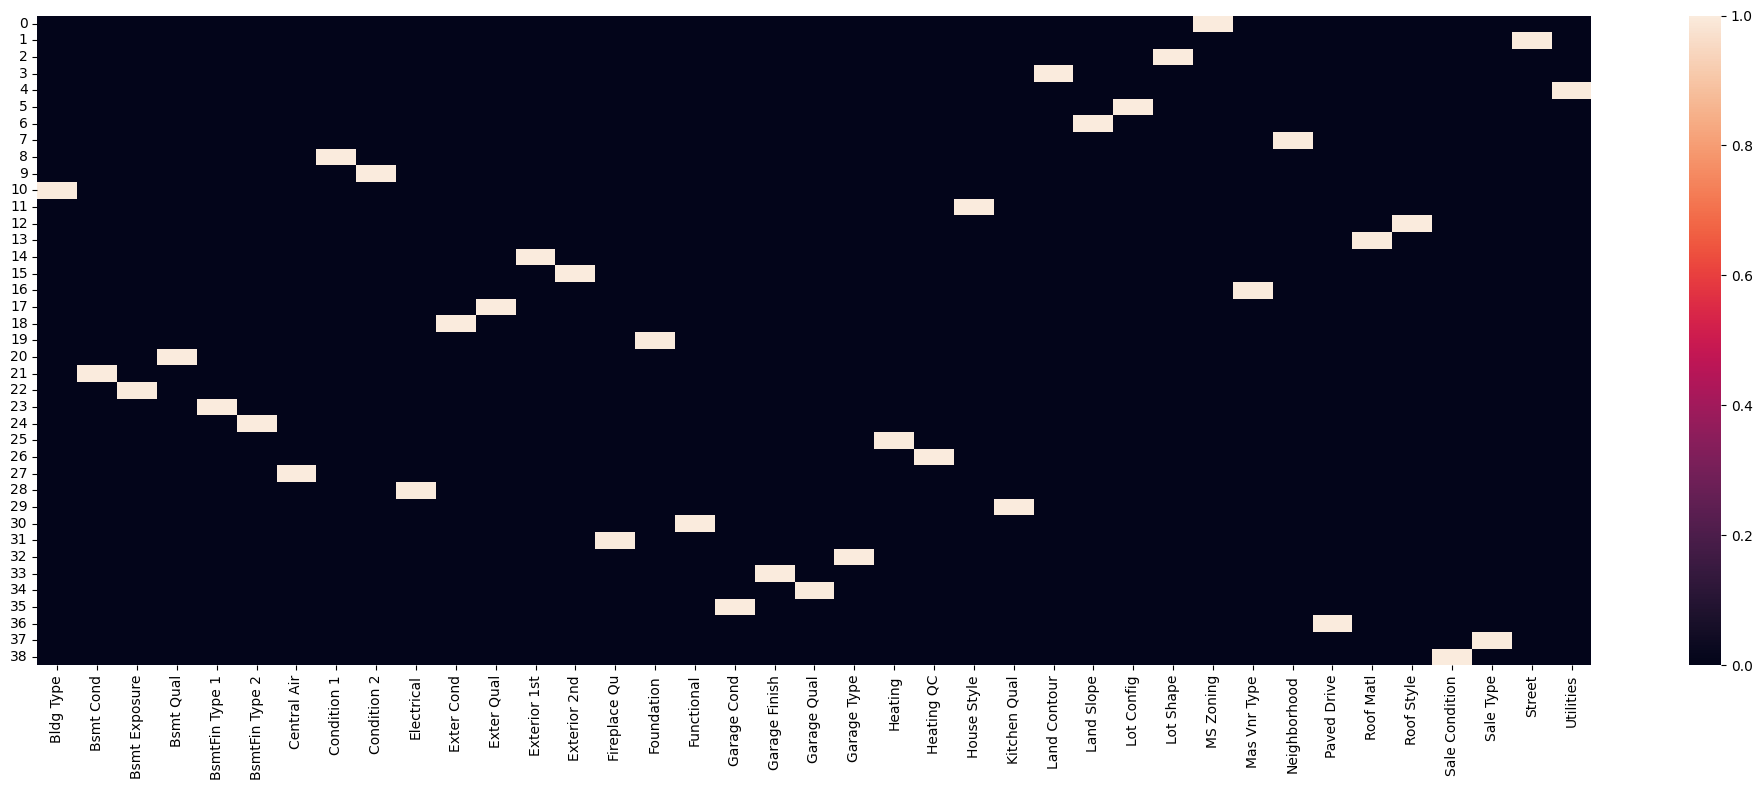

In [153]:
# One-hot encode categorical columns
housing=pd.get_dummies(categorical_columns,columns=['new column'])
plt.figure(figsize=(20,8))
sns.heatmap(housing)

plt.tight_layout()